In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
%matplotlib inline
import pylab
import math

In [6]:
from numpy import array
#np.arange(38)
#velocity = array([1.32666709e+05, 1.13628673e+05, 1.00391570e+05, 8.96188363e+04, 7.75637462e+04, 6.50887959e+04, 5.51862853e+04, 4.77656956e+04, 4.30855144e+04, 3.84630328e+04, 3.54163206e+04, 3.16144128e+04, 2.88068823e+04, 2.59779253e+04, 2.36695572e+04, 2.17921013e+04, 1.98584755e+04, 1.79122810e+04, 1.66651277e+04, 1.51892714e+04, 1.34224825e+04, 1.21081721e+04, 1.10348423e+04, 1.02659328e+04, 9.16400231e+03, 8.35072812e+03, 7.53122564e+03, 7.00562693e+03, 6.25214954e+03, 5.40920539e+03, 3.68894264e+03, 2.06684627e+03, 1.12264205e+03, 6.69274146e+02, 4.28961737e+02, 1.97458305e+02, 1.06147726e+02, 7.35217265e+01])

In [ ]:
#i = np.arange(np.pi,np.pi*13/6,np.pi/6)
#i = i[:7]

In [7]:
#Vx1 = []
#for j in Vx:
    #if np.fabs(j) < 10e-05:
        #Vx1.append(0.0)
    #else:
        #Vx1.append(j)
#print Vx1

In [ ]:
#Vy1 = []
#for j in Vy:
    #if np.fabs(j) < 10e-05:
        #Vy1.append(0.0)
    #else:
        #Vy1.append(j)
#print Vy1

In [11]:
Rg = 1.30051044e+04

Speed = 3.68894264e+03

from numpy import cos,sin
Vy = Speed*sin(np.pi/4)

T_Orb = 2*np.pi*Rg*(1.5*10**8)/Speed

from numpy import array
np.arange(4)
Period2 = array([T_Orb*1, T_Orb*2, T_Orb*3, T_Orb*4, T_Orb*5, T_Orb*6, T_Orb*7, T_Orb*8])
Period = array([T_Orb*1, T_Orb*2, T_Orb*3, T_Orb*4, T_Orb*5, T_Orb*6, T_Orb*7, T_Orb*8, T_Orb*9, T_Orb*10,T_Orb*11, T_Orb*12, T_Orb*13, T_Orb*14])


In [28]:
V_r = (Speed*sin(np.pi/4))**2
const = (2.52906361193e-10*6.088e+18)/(1.99e+30)
# dv = F*dt/m
dv = (V_r*const*Period)

v_pi_over4 = dv/Vy

print Vy
print dv

2608.47635615
[  1.74919488e-05   3.49838976e-05   5.24758464e-05   6.99677952e-05
   8.74597440e-05   1.04951693e-04   1.22443642e-04   1.39935590e-04
   1.57427539e-04   1.74919488e-04   1.92411437e-04   2.09903386e-04
   2.27395334e-04   2.44887283e-04]


In [22]:
Vy1 = Speed*sin(np.pi/3)

V_r1 = (Speed*sin(np.pi/3))**2
const = (2.52906361193e-10*6.088e+18)/(1.99e+30)

dv1 = V_r1*const*Period

v_pi_over3 = dv1/Vy1

print v_pi_over3

[  8.21290733e-09   1.64258147e-08   2.46387220e-08   3.28516293e-08
   4.10645366e-08   4.92774440e-08   5.74903513e-08   6.57032586e-08
   7.39161659e-08   8.21290733e-08   9.03419806e-08   9.85548879e-08
   1.06767795e-07   1.14980703e-07]


In [23]:
Vy2 = Speed*sin(np.pi/6)

V_r2 = (Speed*sin(np.pi/6))**2
const = (2.52906361193e-10*6.088e+18)/(1.99e+30)

dv2 = V_r2*const*Period

v_pi_over6 = dv2/Vy2

In [24]:
Vy3 = Speed*sin(np.pi/2)

V_r3 = (Speed*sin(np.pi/2))**2
const = (2.52906361193e-10*6.088e+18)/(1.99e+30)

dv3 = V_r3*const*Period

v_pi_over2 = dv3/Vy3

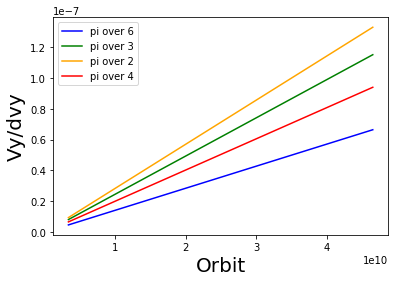

In [26]:
plt.plot(Period,v_pi_over6, c='b',label = 'pi over 6')
plt.plot(Period,v_pi_over3, color='green', label = 'pi over 3')
plt.plot(Period,v_pi_over2, color='orange', label = 'pi over 2')
plt.plot(Period,v_pi_over4, c='r',label = 'pi over 4')


plt.xlabel('Orbit',fontsize=20)
plt.ylabel('Vy/dvy',fontsize=20)
plt.legend()
plt.savefig('ratio vs orbit.pdf')

In [29]:
inv_t = 1/Period

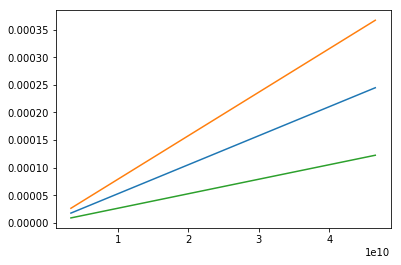

In [33]:
plt.plot(Period,dv)
plt.plot(Period,dv1)
plt.plot(Period,dv2)